# 1. Using a fixed order model for time series prediction (also known as Autoregressive prediction)

When we use an fixed order dynamic system as a time series model, it is often called an Autoregressive process. 

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# import autograd functionality
import autograd.numpy as np

# import testing libraries
import sys
sys.path.append('../../')
from mlrefined_libraries import recurrent_library as reclib

# import dataset path
datapath = '../../mlrefined_datasets/recurrent_datasets/'

# import various other libraries e.g., for plotting, deep copying
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in simple dataset

Dataset loaded in below.

In [5]:
# load in driver
csvname = datapath + 'normalized_apple_prices.csv'
x_series = np.loadtxt(csvname,delimiter = ',')[np.newaxis,:]

Standard normalize the dataset - center and divide off the std.

In [9]:
# standard normalize input series
normalizer,inverse_normalizer = reclib.time_series_lib.normalizers.standard(x_series)
x_series = normalizer(x_series)

 Plot the standard normalized series.

<IPython.core.display.Javascript object>


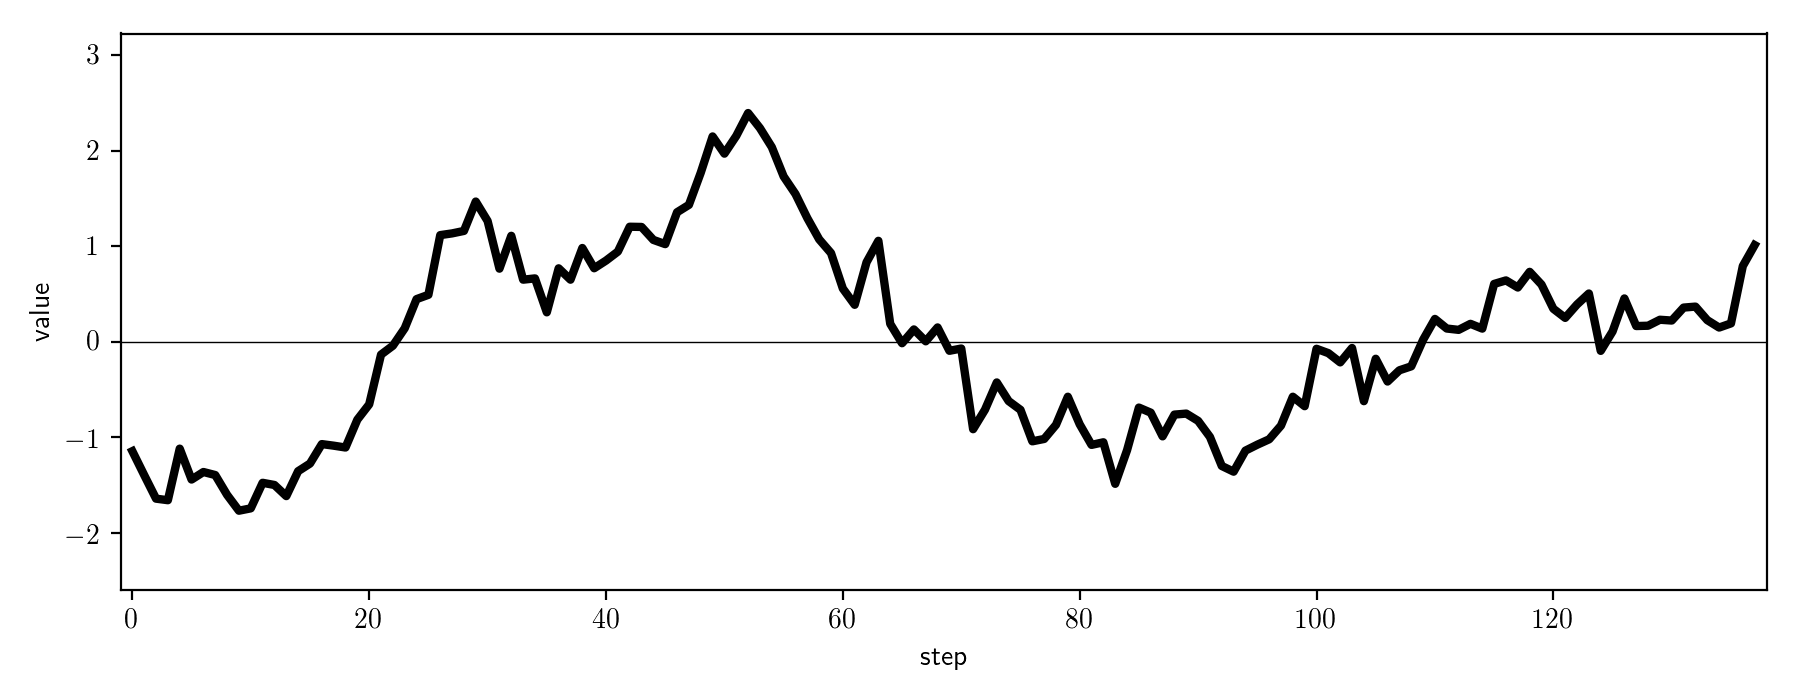

In [10]:
# Plot the standard normalized series
reclib.time_series_lib.fixed_order_plotters.plot_sequences(x_series)

# cut series into order-length window input/output pairs

Cut the sequence into input/output pairs where the input has length equal to the desired order.

In [12]:
# create windowed series
order = 5
x,y = reclib.time_series_lib.utils.window_series(x_series,order = order)

# Regress on pairs

<IPython.core.display.Javascript object>


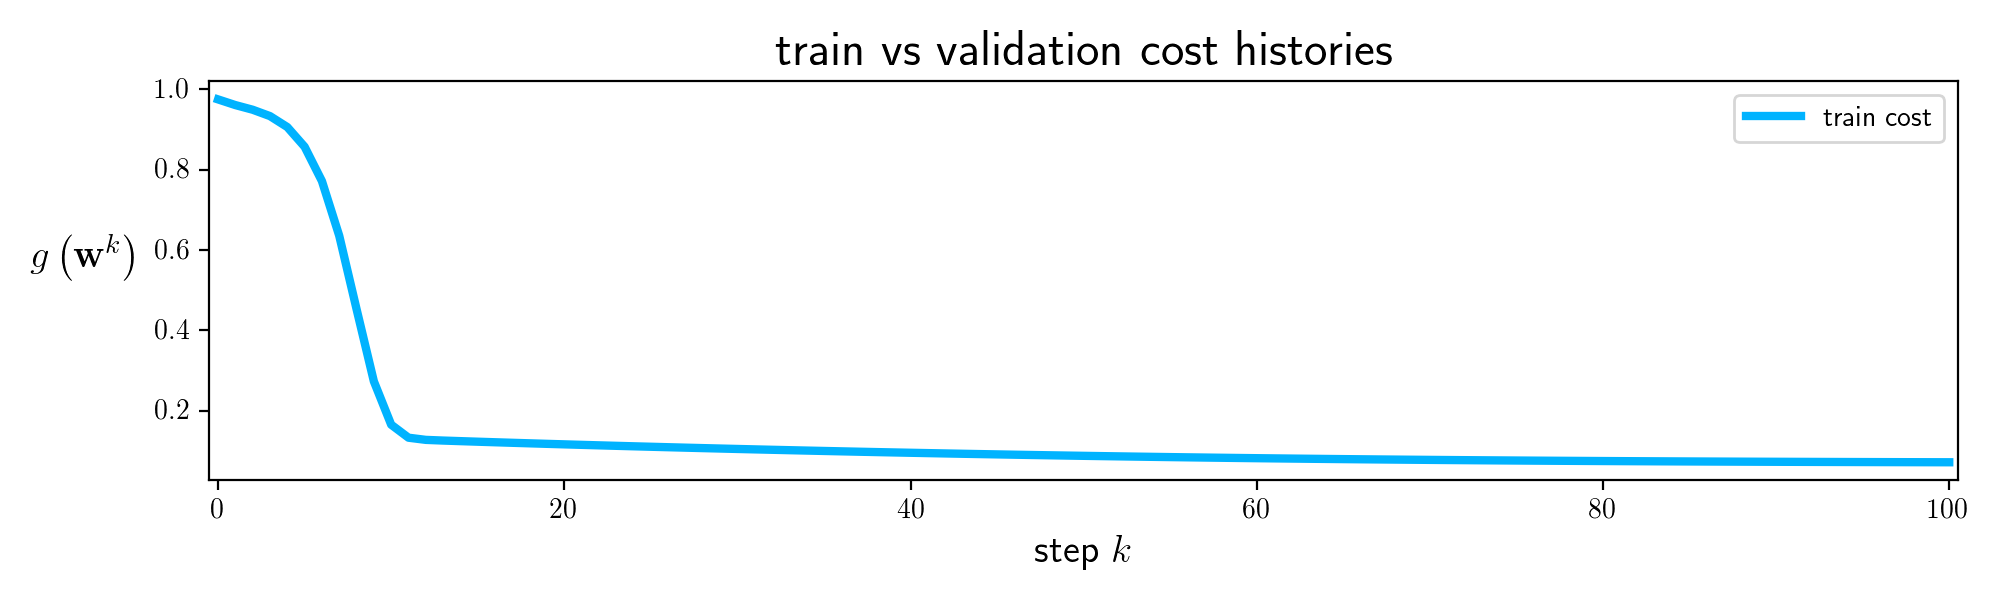

In [13]:
# This code cell will not be shown in the HTML version of this notebook
# initialize with input/output data
mylib1 = reclib.time_series_lib.basic_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib1.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib1.make_train_val_split(train_portion = 1)

# choose cost
mylib1.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [1]
mylib1.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'linear',scale = 0.1)

# fit an optimization
mylib1.fit(max_its = 100,alpha_choice = 10**(-1),verbose = False)

# show cost function history
mylib1.show_histories()

Lets take a look - the series is plotted by the next cell.

<IPython.core.display.Javascript object>


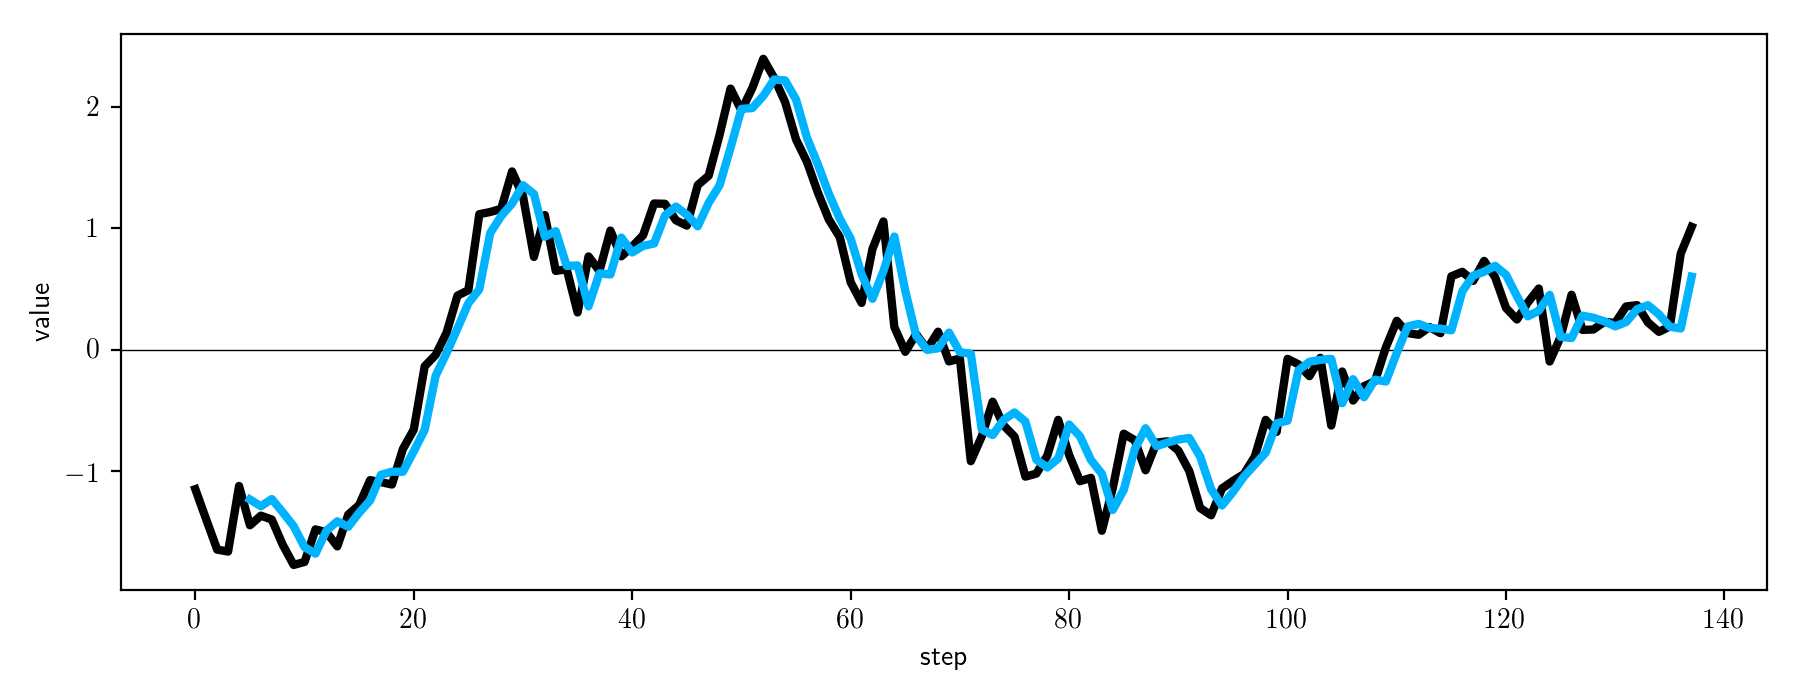

In [14]:
# Plot the standard normalized series and its training fit
reclib.time_series_lib.fixed_order_plotters.plot_train_val_sequences(mylib1,x_series)

# fit with a validation set

Set aside a portion for training / validation.

<IPython.core.display.Javascript object>


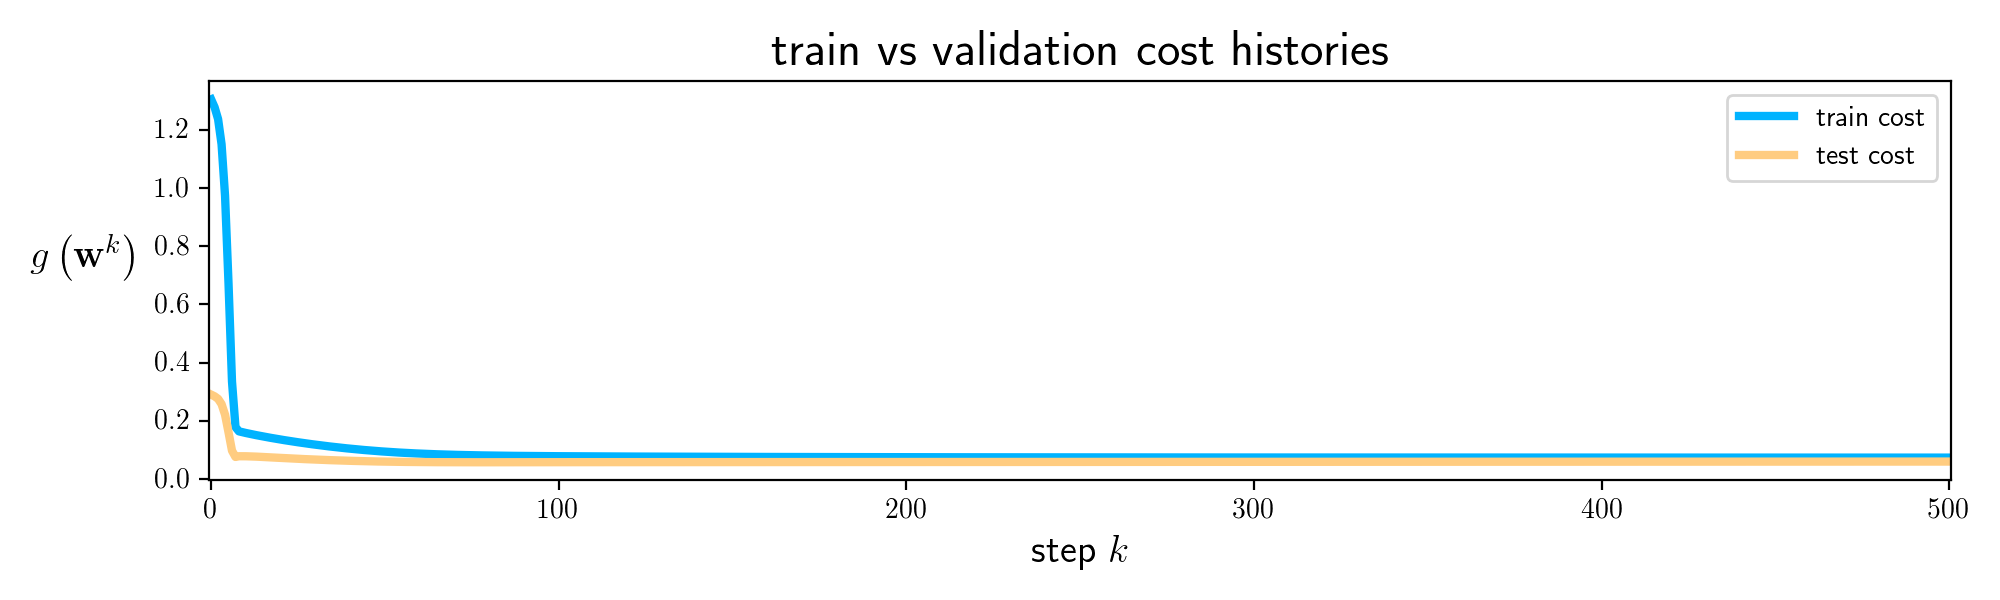

In [15]:
# This code cell will not be shown in the HTML version of this notebook
# initialize with input/output data
mylib2 = reclib.time_series_lib.basic_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib2.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib2.make_train_val_split(train_portion = 0.66)

# choose cost
mylib2.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [1]
mylib2.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'linear',scale = 0.1)

# fit an optimization
mylib2.fit(max_its = 500,alpha_choice = 10**(-1),verbose = False)

# show cost function history
mylib2.show_histories()

- Get model and weights based on lowest validation score.

- Generate predictions on training set.

- Lets take a look - the series is plotted by the next cell.

<IPython.core.display.Javascript object>


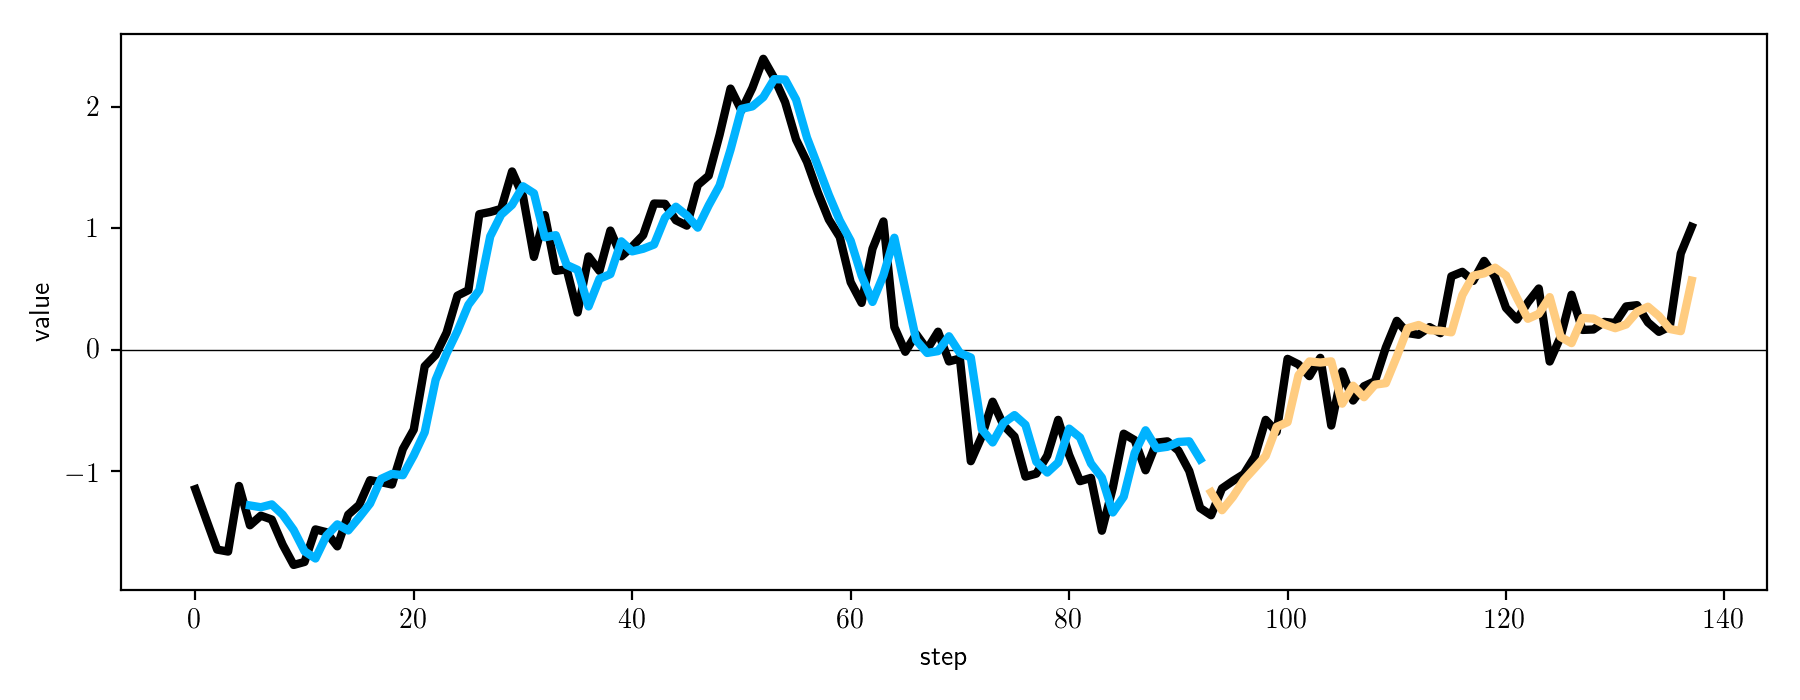

In [16]:
# Plot the standard normalized series
reclib.time_series_lib.fixed_order_plotters.plot_train_val_sequences(mylib2,x_series)

# fit with a generator

This - mechanically speaking - is just like the training / validation set mechanics above, only the history plotter contains any difference.  Inside we use the trained model as a generator.

<IPython.core.display.Javascript object>


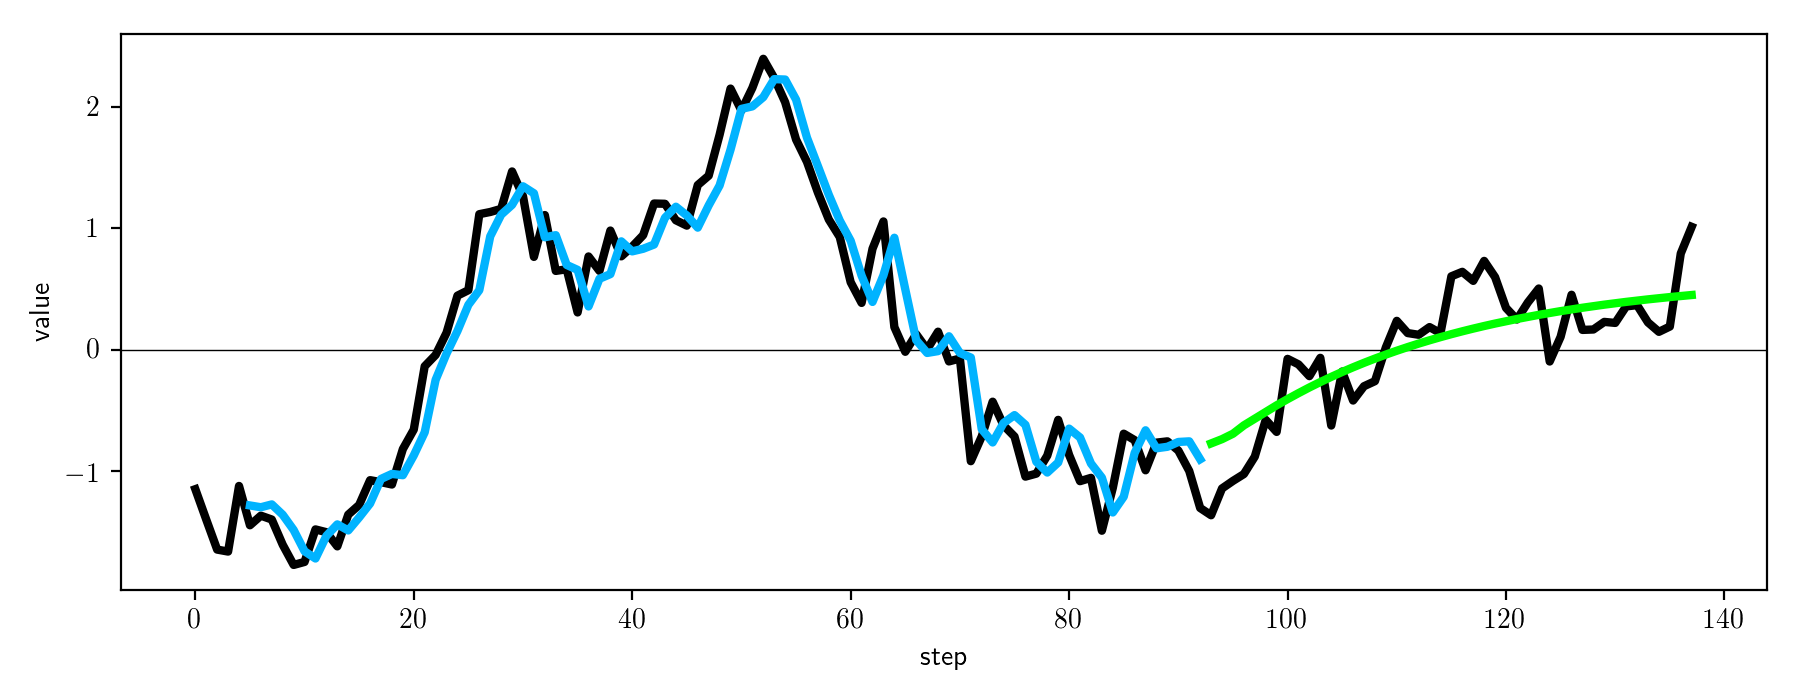

In [17]:
# Plot the standard normalized series
reclib.time_series_lib.fixed_order_plotters.plot_train_gen_sequences(mylib2,x_series)